In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Load: Load banglore home prices into a dataframe

In [2]:
import pandas as pd
import re
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


### Drop features that are not required to build our model

In [3]:
df.drop(["area_type","availability","society","balcony"],axis=1,inplace=True)
df.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [4]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

### Data Cleaning: Handle NA values

In [5]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df.shape

(13246, 5)

### Feature Engineering
Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [8]:
df["bhk"]=df["size"].apply(lambda x: (x.split(' ')[0]))
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [9]:
df.drop(["size"],axis=1,inplace=True)
df.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4


In [10]:
df["total_sqft"].value_counts()
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df["total_sqft"].apply(isfloat)].head(10)


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [12]:
def conversion(x):
    list1=x.split("-")
    if len(list1)==2:
        return((float(list1[0])+float(list1[1]))/2)
    try:
        return float(x)
    except:
        return None
df["total_sqft"]=df["total_sqft"].apply(conversion)
df["total_sqft"].head(10)

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
5    1170.0
6    2732.0
7    3300.0
8    1310.0
9    1020.0
Name: total_sqft, dtype: float64

In [13]:
conversion("34.46Sq. Meter")
#returning None

In [14]:
df.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

#### Add new feature called price per square feet

In [15]:
df["price_per_sq_ft"]=(df["price"]/df["total_sqft"])*100000
df

,location,total_sqft,bath,price,bhk,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [16]:
df["location"]=df["location"].apply(lambda x:x.strip())

In [17]:
df1=df["location"].value_counts()
df2=df1[df1<=10]
df2

1st Block Koramangala                    10
Nagadevanahalli                          10
Gunjur Palya                             10
Sector 1 HSR Layout                      10
Sadashiva Nagar                          10
                                         ..
Bidere Agarahara, Behind Safal market     1
Pulikeshi Nagar                           1
MEI layout, Bagalgunte                    1
Bandepalya                                1
Pillahalli                                1
Name: location, Length: 1052, dtype: int64

In [18]:
len(df2)

1052

### Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [19]:
df["location"]=df["location"].apply(lambda x:"other" if x in df2 else x )
df.head(10)

,location,total_sqft,bath,price,bhk,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [20]:
df.dtypes

location            object
total_sqft         float64
bath               float64
price              float64
bhk                 object
price_per_sq_ft    float64
dtype: object

In [21]:
df["bhk"]=df["bhk"].astype("int")
df.dtypes

location            object
total_sqft         float64
bath               float64
price              float64
bhk                  int64
price_per_sq_ft    float64
dtype: object

### Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [22]:
df[df["total_sqft"]/df["bhk"]<300]

,location,total_sqft,bath,price,bhk,price_per_sq_ft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [23]:
df=df[~(df["total_sqft"]/df["bhk"]<300)]
df.shape

(12502, 6)

### Outlier Removal Using Standard Deviation and Mean

In [24]:
df["price_per_sq_ft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sq_ft, dtype: float64

### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [25]:
import numpy as np
def remove_pps_outlier(df):
    df_final=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sq_ft)
        std=np.std(subdf.price_per_sq_ft)
        reduced_df=subdf[(subdf.price_per_sq_ft>(m-std))&(subdf.price_per_sq_ft<=(m+std))]
        df_final=pd.concat([df_final,reduced_df],ignore_index=True)
    return df_final
df=remove_pps_outlier(df)
df.shape

(10241, 6)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

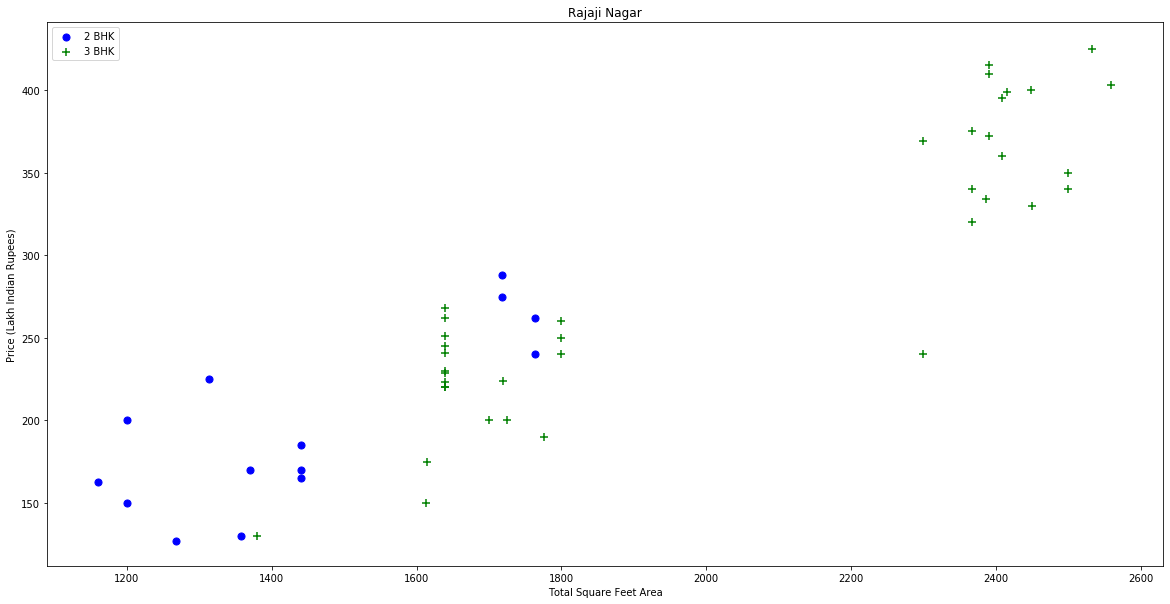

In [26]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [27]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean": np.mean(bhk_df["price_per_sq_ft"]),
                "std": np.std(bhk_df["price_per_sq_ft"]),
                "count": bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df ["price_per_sq_ft"]<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")         
df=remove_bhk_outliers(df)
df.shape


(7329, 6)

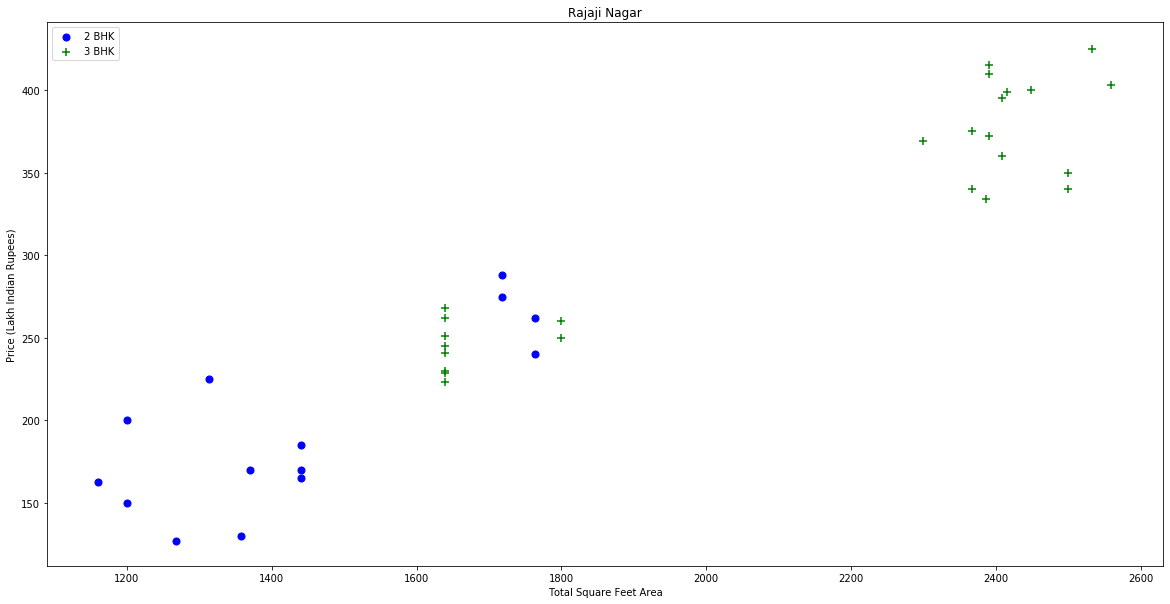

In [28]:
plot_scatter_chart(df,"Rajaji Nagar")

## Outlier Removal Using Bathrooms Feature

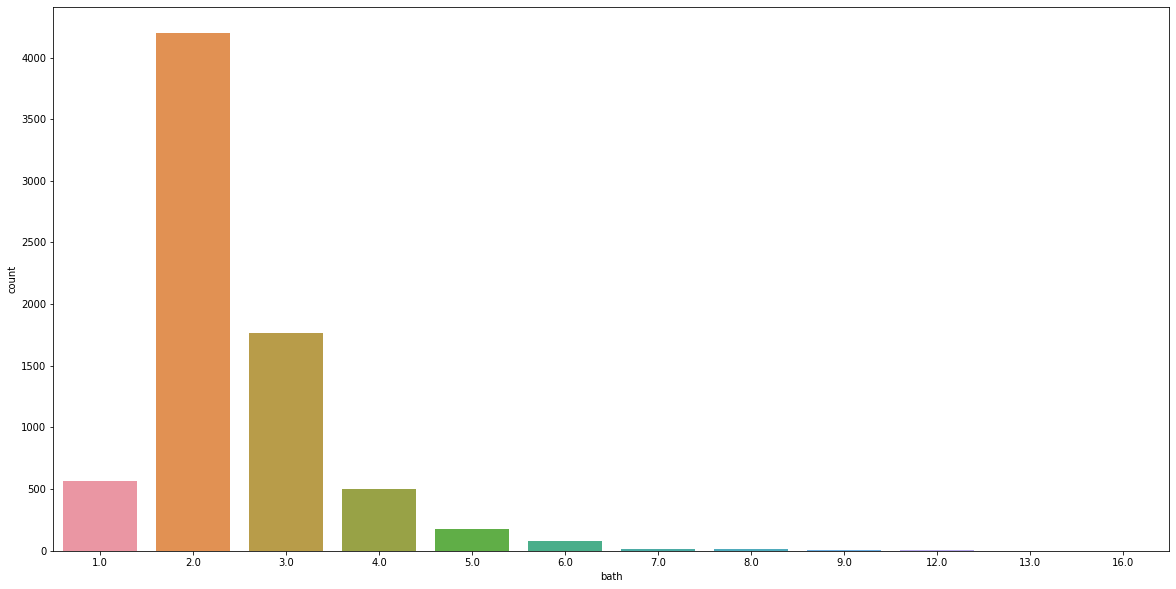

In [29]:
import seaborn as sns
sns.countplot(df["bath"])

In [30]:
df[df["bath"]>10]

,location,total_sqft,bath,price,bhk,price_per_sq_ft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [31]:
df[df["bath"]>df["bhk"]+2]

,location,total_sqft,bath,price,bhk,price_per_sq_ft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [32]:
df=df[(df["bath"]<df["bhk"]+2)]
df

,location,total_sqft,bath,price,bhk,price_per_sq_ft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301
10237,other,812.0,1.0,26.0,1,3201.970443


In [33]:
df=df.drop(["price_per_sq_ft"],axis=1)
df.shape

(7251, 5)

## Use One Hot Encoding For Location

In [34]:
dummies=pd.get_dummies(df["location"],drop_first=True)
dummies

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df=pd.concat([dummies,df],axis=1)
df

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,location,total_sqft,bath,price,bhk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1630.0,3.0,194.0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1875.0,2.0,235.0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1200.0,2.0,130.0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,1200.0,2.0,70.0,2
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,1800.0,1.0,200.0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,1353.0,2.0,110.0,2
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,other,812.0,1.0,26.0,1


In [36]:
df=df.drop(["location"],axis=1)
df

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,total_sqft,bath,price,bhk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2850.0,4.0,428.0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1630.0,3.0,194.0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1875.0,2.0,235.0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1200.0,2.0,130.0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1235.0,2.0,148.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1200.0,2.0,70.0,2
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1800.0,1.0,200.0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1353.0,2.0,110.0,2
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,812.0,1.0,26.0,1


## Build a Model Now..

In [37]:
X=df.drop(["price"],axis=1)
y=df["price"]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.8494788916419606

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [40]:
from sklearn.model_selection import ShuffleSplit#(for selecting variables from uniform distribution)
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

#### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.699280,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.769105,"{'criterion': 'mse', 'splitter': 'random'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [48]:
def predict_price(location,total_sqft,bath,bhk):
    loc_index=np.where(X.columns==location)
    x=np.zeros(len(X.columns))
    tsf_index=np.where(X.columns=='total_sqft')
    x[tsf_index]=total_sqft
    bath_index=np.where(X.columns=='bath')
    x[bath_index]=bath
    bhk_index=np.where(X.columns=='bhk')
    x[bhk_index]=bhk
    x[loc_index]=1
    return lm.predict([x])

In [49]:
predict_price('1st Phase JP Nagar',1000,2,2)

array([87.73026324])

In [50]:
predict_price('1st Phase JP Nagar',1000,3,3)

array([89.28613128])

In [51]:
predict_price('1st Phase JP Nagar',1000,3,3)

array([89.28613128])

## Export the tested model to a pickle file

In [52]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lm,f)